In [41]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits import mplot3d

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 딥러닝 맛보기

In [6]:
# 시드값 고정
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
# 데이터 불러오기
Data_set = pd.read_csv('e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/딥러닝_양진욱/dataset/ThoraricSurgery.csv', header=None)
Data_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [13]:
# target 분리
X = Data_set.iloc[:,:-1]
y = Data_set.iloc[:,-1]

In [14]:
# 층쌓기
model = Sequential() # 객체 생성
model.add(Dense(30, input_dim=17, activation='relu')) # 레이어 추가, 노드수=30, 입력차원=17, 활성화함수=렐루
model.add(Dense(1, activation='sigmoid')) # 이진분류이므로 활성화함수=시그모이드, 노드 1개

In [15]:
# 모델 컴파일 및 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 928us/step - loss: 53.2297 - accuracy: 0.1468
Epoch 2/100
47/47 [==============================] - 0s 921us/step - loss: 6.2724 - accuracy: 0.6213
Epoch 3/100
47/47 [==============================] - 0s 971us/step - loss: 1.6489 - accuracy: 0.8191
Epoch 4/100
47/47 [==============================] - 0s 916us/step - loss: 1.3594 - accuracy: 0.7915
Epoch 5/100
47/47 [==============================] - 0s 922us/step - loss: 1.1503 - accuracy: 0.7979
Epoch 6/100
47/47 [==============================] - 0s 943us/step - loss: 0.9985 - accuracy: 0.7787
Epoch 7/100
47/47 [==============================] - 0s 980us/step - loss: 0.8808 - accuracy: 0.7809
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.7780 - accuracy: 0.7830
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.7830
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0

47/47 [==============================] - 0s 804us/step - loss: 0.4123 - accuracy: 0.8468
Epoch 82/100
47/47 [==============================] - 0s 869us/step - loss: 0.3877 - accuracy: 0.8489
Epoch 83/100
47/47 [==============================] - 0s 934us/step - loss: 0.4040 - accuracy: 0.8532
Epoch 84/100
47/47 [==============================] - 0s 891us/step - loss: 0.4071 - accuracy: 0.8447
Epoch 85/100
47/47 [==============================] - 0s 869us/step - loss: 0.4012 - accuracy: 0.8468
Epoch 86/100
47/47 [==============================] - 0s 891us/step - loss: 0.4082 - accuracy: 0.8489
Epoch 87/100
47/47 [==============================] - 0s 869us/step - loss: 0.4288 - accuracy: 0.8383
Epoch 88/100
47/47 [==============================] - 0s 804us/step - loss: 0.4105 - accuracy: 0.8404
Epoch 89/100
47/47 [==============================] - 0s 847us/step - loss: 0.4025 - accuracy: 0.8468
Epoch 90/100
47/47 [==============================] - 0s 826us/step - loss: 0.4070 - accuracy: 

# 회귀식 구하기

In [17]:
x = [2,4,6,8]
y = [81,93,91,97]

In [19]:
# x와 y의 평균 구하기
mx = np.mean(x)
my = np.mean(y)
print(f'x의 평균 : {mx}, y의 평균 : {my}')

x의 평균 : 5.0, y의 평균 : 90.5


In [20]:
# 회귀식 기울기의 분모와 분자 구하기

# 분모
divisor = sum([(mx-i)**2 for i in x])

# 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i]-mx)*(y[i]-my)
    return d
dividend = top(x, mx, y, my)

print(f'분자 : {dividend}, 분모 : {divisor}')

분자 : 46.0, 분모 : 20.0


In [21]:
# 기울기와 y 절편 구하기
a = dividend/divisor
b = my-(mx*a)

print(f'기울기 : {a}, y절편 : {b}')

기울기 : 2.3, y절편 : 79.0


# 임의의 회귀식에 따른 MSE 계산

In [23]:
# 임의의 회귀식 기울기와 y 절편 지정
fake_a_b = [3,76]

# x 값과 y 값
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

In [24]:
# 임의의 회귀식에 따른 예측값을 출력하는 함수 정의
def predict(x):
    return fake_a_b[0]*x+fake_a_b[1]

# 각 예측값에 대한 MSE를 구하는 함수 정의
def mse(y,y_hat):
    return ((y-y_hat)**2).mean()

# 전체 MSE를 구하는 함수 정의
def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))

In [31]:
# 예측값을 담은 리스트 생성
predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부시간=%.f, 실제점수=%.f, 예측점수=%.f' % (x[i],y[i],predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [32]:
# mse 결과
print(f'MSE : {mse_val(predict_result,y)}')

MSE : 11.0


# 경사하강법을 이용한 회귀식 추정

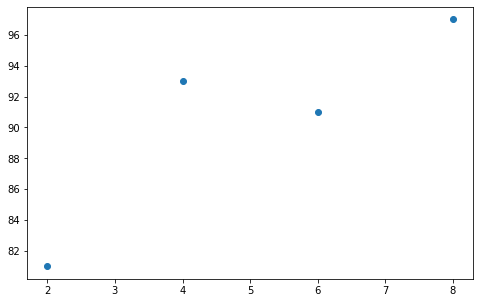

In [36]:
# 데이터 확인하기
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.show()

In [39]:
# x와 y를 np.array로 변환 : 리스트는 각 값에 대한 연산이 불가능함
x_data = np.array(x)
y_data = np.array(y)

# 초기 기울기와 절편 지정
a = 0
b = 0

# 학습률 설정
lr = 0.03 

# 반복횟수 설정
epochs = 2001 

# 경사 하강법을 통해 a와 b가 수렴하는 값 찾기
for i in range(epochs):
    y_hat = a * x_data + b  # 예측값을 구하는 식(회귀식)
    error = y_data - y_hat  # 오차
    a_diff = -(2/len(x_data)) * sum(x_data * (error)) # 오차함수를 a로 편미분, 오차함수는 오차의제곱합을 n으로 나눈것
    b_diff = -(2/len(x_data)) * sum(error)  # 오차함수를 b로 편미분 
    a = a - lr * a_diff  # 학습률을 곱해 기존의 a값을 업데이트
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값을 출력
        print('epoch=%.f, 기울기=%.04f, 절편=%.04f' % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


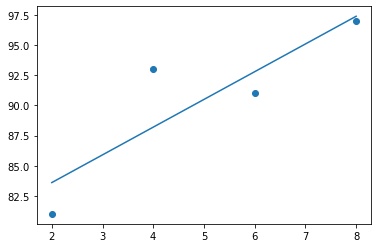

In [40]:
# 경사하강법으로 구한 회귀선 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

# 경사하강법을 이용해 다중 회귀식 추정하기

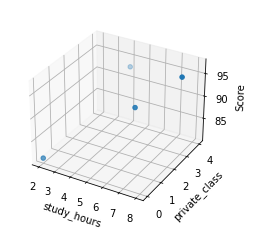

In [44]:
# 데이터 확인
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11 
ax.scatter(x1, x2, y)
plt.show()

In [45]:
# 단순회귀와 마찬가지의 순서로 다중회귀식 추정

# 넘파이 배열로 변경
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기와 절편 초기값 지정
a1 = 0
a2 = 0
b = 0

# 학습률 지정
lr = 0.05 

# 반복횟수 지정
epochs = 2001 

# 경사 하강법 수행
for i in range(epochs): 
    y_pred = a1 * x1_data + a2 * x2_data + b  
    error = y_data - y_pred  
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error)) 
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error))  
    b_new = -(1/len(x1_data)) * sum(y_data - y_pred)  
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff 
    b = b - lr * b_new  
    if i % 100 == 0:   
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

epoch=0, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
epoch=100, 기울기1=6.4348, 기울기2=3.9893, 절편=43.9757
epoch=200, 기울기1=3.7255, 기울기2=3.0541, 절편=62.5766
epoch=300, 기울기1=2.5037, 기울기2=2.6323, 절편=70.9656
epoch=400, 기울기1=1.9527, 기울기2=2.4420, 절편=74.7491
epoch=500, 기울기1=1.7042, 기울기2=2.3562, 절편=76.4554
epoch=600, 기울기1=1.5921, 기울기2=2.3175, 절편=77.2250
epoch=700, 기울기1=1.5415, 기울기2=2.3001, 절편=77.5720
epoch=800, 기울기1=1.5187, 기울기2=2.2922, 절편=77.7286
epoch=900, 기울기1=1.5084, 기울기2=2.2886, 절편=77.7992
epoch=1000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
epoch=1100, 기울기1=1.5017, 기울기2=2.2863, 절편=77.8453
epoch=1200, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1300, 기울기1=1.5003, 기울기2=2.2858, 절편=77.8547
epoch=1400, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8561
epoch=1500, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=1600, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8569
epoch=1700, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8570
epoch=1800, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=1900, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
epoch=2000, 기울기1=1.5000, 기울기2=2

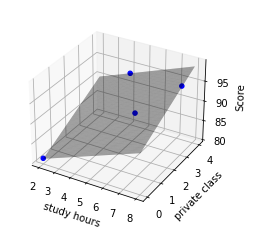

In [46]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기

import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()

# 로지스틱 회귀

(-0.1, 1.1)

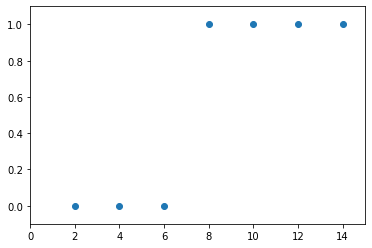

In [48]:
# 데이터 확인

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [49]:
# 로지스틱 회귀식의 a와 b 초기값 지정
a = 0
b = 0

# 학습률 지정
lr = 0.05 

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

# 경사 하강법 수행
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data) # 오차함수를 a에 대해 편미분, 로지스틱 회귀의 오차함수는 로그함수의 조합으로 나타남
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:  
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


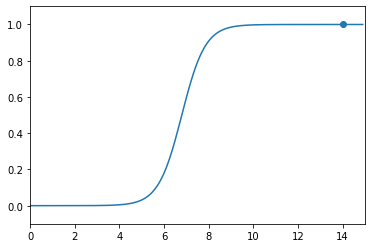

In [50]:
# 구해진 식으로 그래프 그리기
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

# 다중 퍼셉트론을 이용해 XOR 문제 해결하기

In [52]:
# 가중치 w와 바이어스 b 지정
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b # 모든 입력값에 대해 각각의 가중치를 곱한 값을 더하고 마지막에 바이어스를 더해줌
    if y <= 0:         # 시그모이드함수의 출력값과 비슷한 형태
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1) # 은닉층의 첫번째 노드

# OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1, x2]), w12, b2) # 은닉층의 두번째 노드

# AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1, x2]), w2, b3) # 출력층

# XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))


# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(x[0], x[1])
        print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0
